In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### 1: Student Pass/Fail Prediction

In [2]:
og_data1 = pd.read_csv('student_performance_prediction.csv')
data = og_data1

In [3]:
data.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


* Let's check for NaN in the data

In [4]:
data.isna().sum()

Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

In [5]:
data.shape

(40000, 7)

In [6]:
data.dropna().shape

(29446, 7)

In [7]:
data.shape

(40000, 7)

when we remove the NaN values we are losing about 25% of data, so removing is not an option for us. Let's try to fill them.

But we need to remove the rows that are missing with Target column `Passed`, cause we can't just fill it

In [8]:
data.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,38005.000000,38008.000000,38006.000000
mean,9.962744,75.276323,65.440107
std,5.031154,20.393418,16.503119
min,-12.300000,-14.300000,8.300000
25%,6.600000,61.600000,55.100000
50%,10.000000,75.300000,65.200000
75%,13.400000,88.800000,75.200000
max,32.400000,150.200000,200.000000


How can Study Hours per Week, Attendance Rate can be negative. they might be due to bad entry, lets check how many are there.

In [9]:
negatives = data[data['Attendance Rate'] < 0]
print(f"Negative Attendance Rate count: {len(negatives)}")
negatives = data[data['Study Hours per Week'] < 0]
print(f"Negative Study Hours per Week: {len(negatives)}")

Negative Attendance Rate count: 5
Negative Study Hours per Week: 941


May be we just remove these to avoid these type of issues. But alternatively we can just make the negative to positive

In [10]:
data = data[(data['Attendance Rate'] >= 0) & (data['Study Hours per Week'] >= 0)]

In [11]:
data.dropna(subset=['Passed'], inplace=True)

C:\Users\91970\AppData\Local\Temp\ipykernel_21732\3736411547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Passed'], inplace=True)


In [12]:
data.shape

(33450, 7)

In [13]:
data.isna().sum()

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                1649
Participation in Extracurricular Activities    1668
Parent Education Level                         1668
Passed                                            0
dtype: int64

In [14]:
# filling the missing numerical columns values
data['Study Hours per Week'] = data['Study Hours per Week'].fillna(data['Study Hours per Week'].mean())
data['Previous Grades'] = data['Previous Grades'].fillna(data['Previous Grades'].mean())
data['Attendance Rate'] = data['Attendance Rate'].fillna(data['Attendance Rate'].mean())
data.isna().sum()

C:\Users\91970\AppData\Local\Temp\ipykernel_21732\4098168705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Study Hours per Week'] = data['Study Hours per Week'].fillna(data['Study Hours per Week'].mean())
C:\Users\91970\AppData\Local\Temp\ipykernel_21732\4098168705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Previous Grades'] = data['Previous Grades'].fillna(data['Previous Grades'].mean())
C:\Users\91970\AppData\Local\Temp\ipykernel_21732\4098168705.py:4: SettingWithCopyWarning: 
A

Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                   0
Participation in Extracurricular Activities    1668
Parent Education Level                         1668
Passed                                            0
dtype: int64

In [15]:
print(data['Parent Education Level'].unique())
print('Mode of Parent Education Level is : ', data['Parent Education Level'].mode())

['High School' 'Bachelor' 'Master' 'Doctorate' nan 'Associate']
Mode of Parent Education Level is :  0    Bachelor
Name: Parent Education Level, dtype: object


In [16]:
print(data['Participation in Extracurricular Activities'].unique())
print('Mode of Participation in Extracurricular Activities is : ', data['Participation in Extracurricular Activities'].mode())

['No' 'Yes' nan]
Mode of Participation in Extracurricular Activities is :  0    No
Name: Participation in Extracurricular Activities, dtype: object


In [17]:
# now filling the categorical columns with the mode
data['Parent Education Level'] = data['Parent Education Level'].fillna(data['Parent Education Level'].mode()[0])
data['Participation in Extracurricular Activities'] = data['Participation in Extracurricular Activities'].fillna(data['Participation in Extracurricular Activities'].mode()[0])

data.isna().sum()

C:\Users\91970\AppData\Local\Temp\ipykernel_21732\3168520391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Parent Education Level'] = data['Parent Education Level'].fillna(data['Parent Education Level'].mode()[0])
C:\Users\91970\AppData\Local\Temp\ipykernel_21732\3168520391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Participation in Extracurricular Activities'] = data['Participation in Extracurricular Activities'].fillna(data['Participation in Extracurricular Activities'].mode()[0

Student ID                                     0
Study Hours per Week                           0
Attendance Rate                                0
Previous Grades                                0
Participation in Extracurricular Activities    0
Parent Education Level                         0
Passed                                         0
dtype: int64

Now that we fill all the missing values, we will now proceed to furthur in the process of `EDA`

Text(0.5, 1.0, 'Distribution of Parent Education Level')

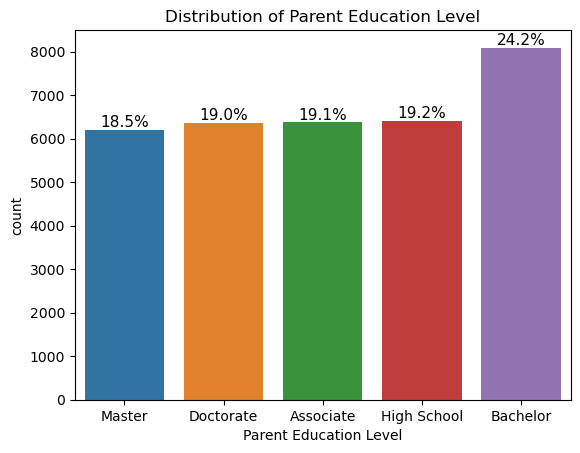

In [18]:
order = data['Parent Education Level'].value_counts().sort_values(ascending=True).index
total = len(data)
ax = sns.countplot(x='Parent Education Level', data=data, order=order)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2, count), 
                ha='center', va='bottom', fontsize=11)
plt.title('Distribution of Parent Education Level')

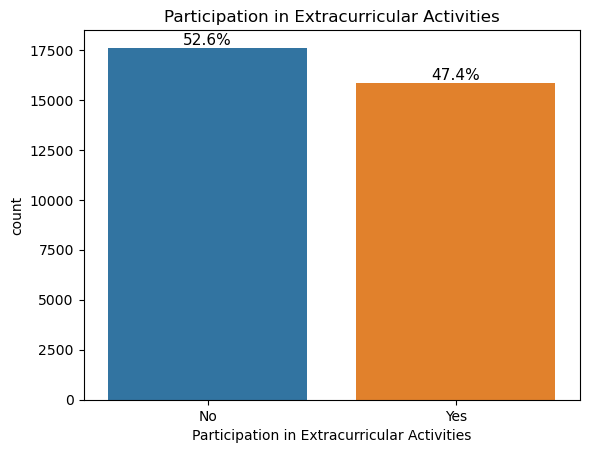

In [19]:
ax = sns.countplot(x = 'Participation in Extracurricular Activities', data = data)
plt.title('Participation in Extracurricular Activities')
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2, count),
                    ha = 'center', va = 'bottom', fontsize = 11)
plt.show()

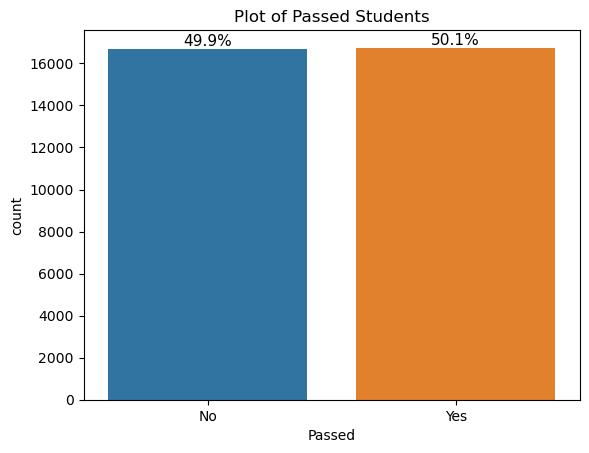

In [20]:
ax = sns.countplot(x = 'Passed', data = data)
plt.title('Plot of Passed Students')
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    ax.annotate(percentage, 
                (p.get_x() + p.get_width() / 2, count),
                    ha = 'center', va = 'bottom', fontsize = 11)
plt.show()

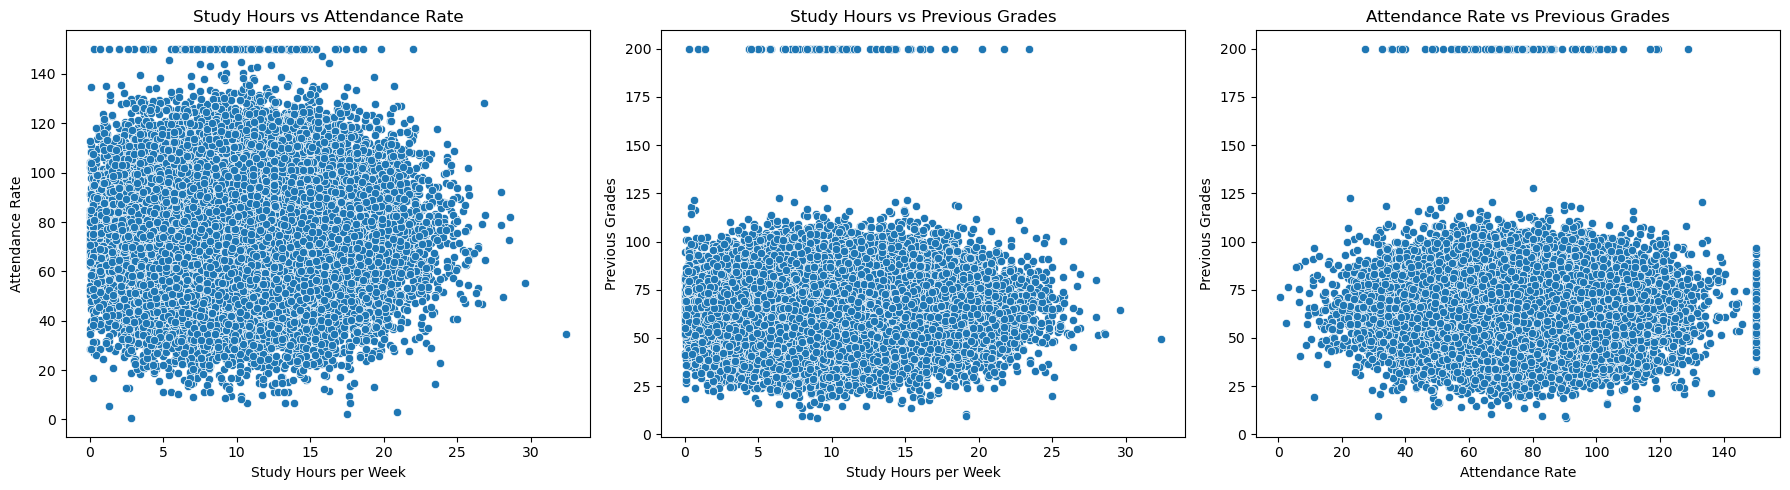

In [21]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Study Hours per Week', y='Attendance Rate', data=data)
plt.title('Study Hours vs Attendance Rate')
plt.xlabel('Study Hours per Week')
plt.ylabel('Attendance Rate')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Study Hours per Week', y='Previous Grades', data=data)
plt.title('Study Hours vs Previous Grades')
plt.xlabel('Study Hours per Week')
plt.ylabel('Previous Grades')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Attendance Rate', y='Previous Grades', data=data)
plt.title('Attendance Rate vs Previous Grades')
plt.xlabel('Attendance Rate')
plt.ylabel('Previous Grades')

plt.tight_layout()
plt.show()

<Axes: >

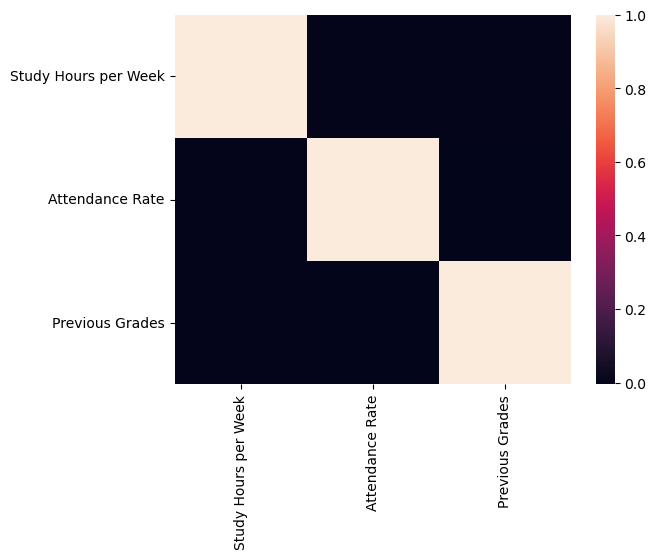

In [22]:
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr())

From the scatter plots or the heatmap there is no clear correlation between ['Study Hours per Week', 'Attendance Rate', 'Previous Grades']

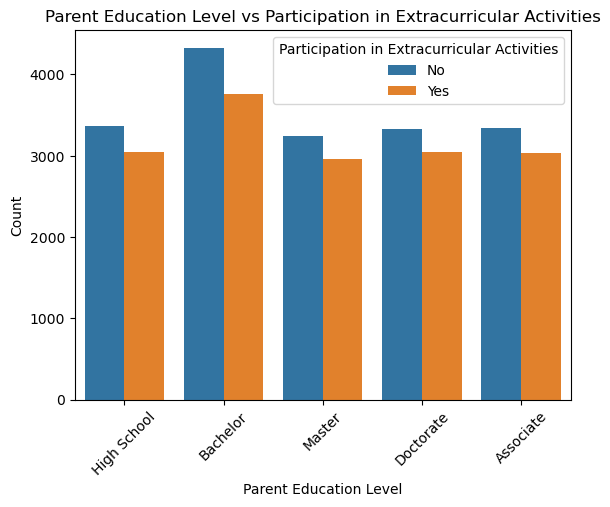

In [23]:
sns.countplot(x='Parent Education Level', hue='Participation in Extracurricular Activities', data=data)
plt.title('Parent Education Level vs Participation in Extracurricular Activities')
plt.xlabel('Parent Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Obviously there is no relation between 'Parent Education Level' and 'Participation in Extracurricular Activities'

Let's convert the categorical columns to numerical columns by imputing

In [24]:
data = pd.get_dummies(data, columns=['Parent Education Level'], drop_first=True)
data['Passed'] = data['Passed'].map({'Yes': 1, 'No': 0})
data['Participation in Extracurricular Activities'] = data['Participation in Extracurricular Activities'].map({'Yes': 1, 'No': 0})

data.dtypes

Student ID                                      object
Study Hours per Week                           float64
Attendance Rate                                float64
Previous Grades                                float64
Participation in Extracurricular Activities      int64
Passed                                           int64
Parent Education Level_Bachelor                   bool
Parent Education Level_Doctorate                  bool
Parent Education Level_High School                bool
Parent Education Level_Master                     bool
dtype: object

In [25]:
# model fitting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = data.drop(columns = ['Passed', 'Student ID'])
y = data['Passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

✅ Model Accuracy: 0.50

Confusion Matrix:
 [[1472 1909]
 [1420 1889]]


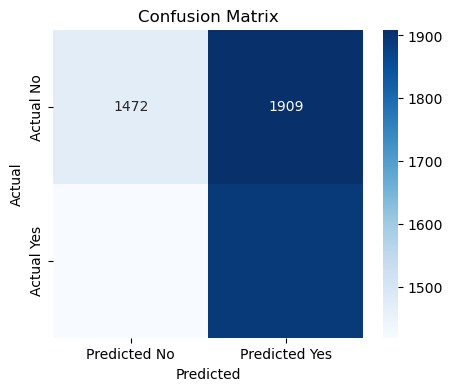


Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.44      0.47      3381
           1       0.50      0.57      0.53      3309

    accuracy                           0.50      6690
   macro avg       0.50      0.50      0.50      6690
weighted avg       0.50      0.50      0.50      6690



In [26]:
# evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.2f}")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))

#### 2: Sentiment Analysis with Natural Language Processing

I got this dataset from kaggle and it is about the game reviews on the steam.

In [27]:
og_data = pd.read_csv('output.csv')
data = og_data
data.head()

,id,app_id,content,author_id,is_positive
0,181331361,100,At least its a counter strike -1/100,76561199556485100,Negative
1,180872601,100,Uh... So far my playthrough has not been great...,76561199230620391,Negative
2,177836246,100,Better mechanics than cs2,76561198417690647,Negative
3,177287444,100,buggy mess and NOT fun to play at all,76561199077268730,Negative
4,176678990,100,"Whoever came up with this, is gonna fucking ge...",76561199104544266,Negative


When i observed the dataset in excel i found out that there are many reviews with no content in it. so i will remove them.

In [28]:
data.shape

(201151, 5)

In [29]:
ata = data[~data['content'].isnull()] 
data = data[data['content'].str.strip() != ''] 
print(f"Remaining rows after cleaning: {data.shape[0]}")

Remaining rows after cleaning: 201090


In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

In [31]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if not isinstance(text, str):
        return ''  
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

data.loc[:, 'content'] = data['content'].apply(preprocess_text)
data.head()

,id,app_id,content,author_id,is_positive
0,181331361,100,at least it a counter strike,76561199556485100,Negative
1,180872601,100,uh so far my playthrough ha not been great gli...,76561199230620391,Negative
2,177836246,100,better mechanic than c,76561198417690647,Negative
3,177287444,100,buggy mess and not fun to play at all,76561199077268730,Negative
4,176678990,100,whoever came up with this is gon na fucking ge...,76561199104544266,Negative


In [32]:
data = data.dropna(subset=['is_positive'])

In [33]:
data.loc[:, 'is_positive'] = data['is_positive'].map({'negative': 0, 'positive': 1})

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed

tfidf_matrix = tfidf_vectorizer.fit_transform(data['content'])

print(tfidf_matrix.shape)

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(), 
    columns=tfidf_vectorizer.get_feature_names_out()
)

tfidf_df.head()

(201090, 1000)


,abandoned,ability,able,about,absolute,absolutely,account,achievement,across,action,...,yes,yet,you,youll,your,youre,yourself,youve,zero,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
X = tfidf_df
y = data['is_positive']

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))